In [1]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("william2020/marine-microplastics")

print("Path to dataset files:", path)

c:\Users\isaw9\AppData\Local\Programs\Python\Python312\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Path to dataset files: C:\Users\isaw9\.cache\kagglehub\datasets\william2020\marine-microplastics\versions\1


In [2]:
# Tratamiento de datos
# -----------------------------------------------------------------------
import pandas as pd
import numpy as np

# Imputación de nulos usando métodos avanzados estadísticos
# -----------------------------------------------------------------------
from sklearn.impute import SimpleImputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.impute import KNNImputer

# Librerías de visualización
# -----------------------------------------------------------------------
import seaborn as sns
import matplotlib.pyplot as plt
# Configuración
# -----------------------------------------------------------------------
pd.set_option('display.max_columns', None) # para poder visualizar todas las columnas de los DataFrames

In [3]:
df_mp = pd.read_csv("../Archivos/Marine_Microplastics.csv")
df_mp.head()

,OBJECTID,Oceans,Regions,SubRegions,Sampling Method,Measurement,Unit,Density Range,Density Class,Short Reference,Long Reference,DOI,Organization,Keywords,Accession Number,Accession Link,Latitude,Longitude,Date,GlobalID,x,y
0,9676,Atlantic Ocean,NaN,NaN,Grab sample,0.018,pieces/m3,0.005-1,Medium,Barrows et al.2018,"Barrows, A.P.W., S.E. Cathey, C.W. Petersen. 2...",https://doi.org/10.1016/j.envpol.2018.02.062,Adventure Scientist,Adventure Scientist/Citizen Science,211009,https://www.ncei.noaa.gov/access/metadata/land...,-31.696000,-48.560000,8/11/2015 12:00:00 AM,a77121b2-e113-444e-82d9-7af11d62fdd2,-48.560000,-31.696000
1,6427,Pacific Ocean,NaN,NaN,Neuston net,0.000,pieces/m3,0-0.0005,Very Low,Law et al.2014,"Law, K.L, S.K. Morét-Ferguson, D.S. Goodwin, E...",https://doi.org/10.1021/es4053076,Sea Education Association,SEA,211008,https://www.ncei.noaa.gov/access/metadata/land...,6.350000,-121.850000,12/18/2002 12:00:00 AM,be27c450-02ca-4261-8d89-cae21108e6cc,-121.850000,6.350000
2,10672,Pacific Ocean,NaN,NaN,Manta net,0.013,pieces/m3,0.005-1,Medium,Goldstein et al.2013,"Goldstein, M.C., A.J. Titmus, M. Ford. 2013. S...",https://doi.org/10.1371/journal.pone.0080020,Scripps Institution of Oceanography-University...,Great Pacific Garbage Patch/SEAPLEX,253448,https://www.ncei.noaa.gov/access/metadata/land...,0.500000,-95.350000,10/17/2006 12:00:00 AM,23effcdd-35b7-4e1e-adb4-390693a287d3,-95.350000,0.500000
3,13921,Atlantic Ocean,NaN,NaN,Aluminum bucket,1368.000,pieces/m3,>=10,Very High,Queiroz et al.2022,"Queiroz, A.F.dos S., A.S. da Conceição, D. Che...",https://doi.org/10.1016/j.scitotenv.2022.156259,"Federal University of Pará, Brazil",Amazon Continental Shelf,276482,https://www.ncei.noaa.gov/access/metadata/land...,0.631825,-45.398158,10/17/2018 12:00:00 AM,16d77822-0533-4116-97b9-0bdb592f3d6e,-45.398158,0.631825
4,9344,Pacific Ocean,NaN,NaN,Grab sample,0.001,pieces/m3,0.0005-0.005,Low,Barrows et al.2018,"Barrows, A.P.W., S.E. Cathey, C.W. Petersen. 2...",https://doi.org/10.1016/j.envpol.2018.02.062,Adventure Scientist,Adventure Scientist/Citizen Science,211009,https://www.ncei.noaa.gov/access/metadata/land...,16.623000,-99.697800,1/3/2015 12:00:00 AM,b9e435e3-9e86-4143-8b51-877e5dcdc7a6,-99.697800,16.623000


In [4]:
df_mp.isna().sum()/df_mp.shape[0]*100

OBJECTID             0.000000
Oceans               1.326805
Regions             56.499388
SubRegions          93.600979
Sampling Method      0.000000
Measurement         28.455324
Unit                 0.000000
Density Range        0.000000
Density Class        0.000000
Short Reference      0.000000
Long Reference       0.000000
DOI                  0.000000
Organization         0.000000
Keywords             0.088127
Accession Number     0.000000
Accession Link       0.000000
Latitude             0.000000
Longitude            0.000000
Date                 0.000000
GlobalID             0.000000
x                    0.000000
y                    0.000000
dtype: float64

In [5]:
df_mp.shape

(20425, 22)

In [6]:
df_mp['Measurement'].describe()

count     14613.000000
mean        161.983976
std        2198.862484
min           0.000000
25%           0.000000
50%           0.008640
75%           0.128412
max      110480.000000
Name: Measurement, dtype: float64

In [7]:
# En primer lugar se realizará una visión de nulos y duplicados.

df_mp.duplicated().sum() # No hay duplicados 😀

np.int64(0)

In [8]:
# Gestión de nulos para:Oceans, Regions, Subregions y Mesurement.

In [9]:
df_mp['SubRegions'].unique()

array([nan, 'Eastern Basin', 'Ligurian Sea', 'Tampa Bay', 'Aegean Sea',
       'Western Basin', 'Alboran Sea', 'Balearic Sea', 'Tyrrhenian Sea',
       'Ionian Sea', 'Adriatic Sea', 'Strait of Gibraltar',
       'Florida Keys National Marine Sanctuary', 'Gulf of Riga',
       'Gulf of Suez', 'Coastal Waters of Florida', 'Gulf of Bothnia'],
      dtype=object)

In [10]:
# Registros completos donde ambos son nulos

df_mp[df_mp['Regions'].isnull() & df_mp['SubRegions'].isnull()]


,OBJECTID,Oceans,Regions,SubRegions,Sampling Method,Measurement,Unit,Density Range,Density Class,Short Reference,Long Reference,DOI,Organization,Keywords,Accession Number,Accession Link,Latitude,Longitude,Date,GlobalID,x,y
0,9676,Atlantic Ocean,NaN,NaN,Grab sample,0.018,pieces/m3,0.005-1,Medium,Barrows et al.2018,"Barrows, A.P.W., S.E. Cathey, C.W. Petersen. 2...",https://doi.org/10.1016/j.envpol.2018.02.062,Adventure Scientist,Adventure Scientist/Citizen Science,211009,https://www.ncei.noaa.gov/access/metadata/land...,-31.696000,-48.560000,8/11/2015 12:00:00 AM,a77121b2-e113-444e-82d9-7af11d62fdd2,-48.560000,-31.696000
1,6427,Pacific Ocean,NaN,NaN,Neuston net,0.000,pieces/m3,0-0.0005,Very Low,Law et al.2014,"Law, K.L, S.K. Morét-Ferguson, D.S. Goodwin, E...",https://doi.org/10.1021/es4053076,Sea Education Association,SEA,211008,https://www.ncei.noaa.gov/access/metadata/land...,6.350000,-121.850000,12/18/2002 12:00:00 AM,be27c450-02ca-4261-8d89-cae21108e6cc,-121.850000,6.350000
2,10672,Pacific Ocean,NaN,NaN,Manta net,0.013,pieces/m3,0.005-1,Medium,Goldstein et al.2013,"Goldstein, M.C., A.J. Titmus, M. Ford. 2013. S...",https://doi.org/10.1371/journal.pone.0080020,Scripps Institution of Oceanography-University...,Great Pacific Garbage Patch/SEAPLEX,253448,https://www.ncei.noaa.gov/access/metadata/land...,0.500000,-95.350000,10/17/2006 12:00:00 AM,23effcdd-35b7-4e1e-adb4-390693a287d3,-95.350000,0.500000
3,13921,Atlantic Ocean,NaN,NaN,Aluminum bucket,1368.000,pieces/m3,>=10,Very High,Queiroz et al.2022,"Queiroz, A.F.dos S., A.S. da Conceição, D. Che...",https://doi.org/10.1016/j.scitotenv.2022.156259,"Federal University of Pará, Brazil",Amazon Continental Shelf,276482,https://www.ncei.noaa.gov/access/metadata/land...,0.631825,-45.398158,10/17/2018 12:00:00 AM,16d77822-0533-4116-97b9-0bdb592f3d6e,-45.398158,0.631825
4,9344,Pacific Ocean,NaN,NaN,Grab sample,0.001,pieces/m3,0.0005-0.005,Low,Barrows et al.2018,"Barrows, A.P.W., S.E. Cathey, C.W. Petersen. 2...",https://doi.org/10.1016/j.envpol.2018.02.062,Adventure Scientist,Adventure Scientist/Citizen Science,211009,https://www.ncei.noaa.gov/access/metadata/land...,16.623000,-99.697800,1/3/2015 12:00:00 AM,b9e435e3-9e86-4143-8b51-877e5dcdc7a6,-99.697800,16.623000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20418,7852,Pacific Ocean,NaN,NaN,Neuston net,0.000,pieces/m3,0-0.0005,Very Low,Law et al.2014,"Law, K.L, S.K. Morét-Ferguson, D.S. Goodwin, E...",https://doi.org/10.1021/es4053076,Sea Education Association,SEA,211008,https://www.ncei.noaa.gov/access/metadata/land...,33.060000,-148.130000,10/16/2009 12:00:00 AM,12514012-1683-44f0-ab2b-2ec269e2e906,-148.130000,33.060000
20419,7557,Pacific Ocean,NaN,NaN,Neuston net,0.000,pieces/m3,0-0.0005,Very Low,Law et al.2014,"Law, K.L, S.K. Morét-Ferguson, D.S. Goodwin, E...",https://doi.org/10.1021/es4053076,Sea Education Association,SEA,211008,https://www.ncei.noaa.gov/access/metadata/land...,31.540000,-143.820000,7/6/2008 12:00:00 AM,86bb49ef-27c1-4cba-930a-796315290491,-143.820000,31.540000
20420,9366,Atlantic Ocean,NaN,NaN,Grab sample,0.011,pieces/m3,0.005-1,Medium,Barrows et al.2018,"Barrows, A.P.W., S.E. Cathey, C.W. Petersen. 2...",https://doi.org/10.1016/j.envpol.2018.02.062,Adventure Scientist,Adventure Scientist/Citizen Science,211009,https://www.ncei.noaa.gov/access/metadata/land...,17.100000,-47.550000,2/1/2015 12:00:00 AM,fd4db6d6-aed7-48b1-a22b-402557112e2f,-47.550000,17.100000
20422,6043,Atlantic Ocean,NaN,NaN,Neuston net,0.000,pieces/m3,0-0.0005,Very Low,Law et al.2010,"Law, K.L., S. Morét-Ferguson, N.A. Maximenko, ...",https://doi.org/10.1126/science.1192321,Sea Education Association,SEA,211007,https://www.ncei.noaa.gov/access/metadata/land...,24.140000,-81.980000,5/1/2008 12:00:00 AM,0fd72d83-cd27-42e1-b63a-b015c23b28d2,-81.980000,24.140000


In [11]:
# Lo primero quizás los océanos y Mesurement. Los océanos será facil con la latitud y la longitud

In [12]:
#Relacionar oceanos con Longitud y Latitud
df_mp[df_mp['Oceans'].notnull()].groupby('Oceans')[['Latitude', 'Longitude']].mean().sort_values('Latitude')

,Latitude,Longitude
Oceans,,
Indian Ocean,-26.203959,28.731356
Pacific Ocean,23.412917,-137.379422
Atlantic Ocean,28.981572,-65.054741
Arctic Ocean,77.023468,-40.293646


In [13]:
# Primero, voy a crear una columna nueva, para crear un map en los oceanos, y poder imputar con latitud

df_mp["Oceans"].unique()

array(['Atlantic Ocean', 'Pacific Ocean', 'Arctic Ocean', nan,
       'Indian Ocean'], dtype=object)

In [14]:
dicc ={'Atlantic Ocean':1,'Pacific Ocean':2,'Arctic Ocean':3,'Indian Ocean':4, "nan":None}

In [15]:
df_mp['Oceans_cat']=df_mp['Oceans'].map(dicc)

In [16]:
df_mp

,OBJECTID,Oceans,Regions,SubRegions,Sampling Method,Measurement,Unit,Density Range,Density Class,Short Reference,Long Reference,DOI,Organization,Keywords,Accession Number,Accession Link,Latitude,Longitude,Date,GlobalID,x,y,Oceans_cat
0,9676,Atlantic Ocean,NaN,NaN,Grab sample,0.0180,pieces/m3,0.005-1,Medium,Barrows et al.2018,"Barrows, A.P.W., S.E. Cathey, C.W. Petersen. 2...",https://doi.org/10.1016/j.envpol.2018.02.062,Adventure Scientist,Adventure Scientist/Citizen Science,211009,https://www.ncei.noaa.gov/access/metadata/land...,-31.696000,-48.560000,8/11/2015 12:00:00 AM,a77121b2-e113-444e-82d9-7af11d62fdd2,-48.560000,-31.696000,1.0
1,6427,Pacific Ocean,NaN,NaN,Neuston net,0.0000,pieces/m3,0-0.0005,Very Low,Law et al.2014,"Law, K.L, S.K. Morét-Ferguson, D.S. Goodwin, E...",https://doi.org/10.1021/es4053076,Sea Education Association,SEA,211008,https://www.ncei.noaa.gov/access/metadata/land...,6.350000,-121.850000,12/18/2002 12:00:00 AM,be27c450-02ca-4261-8d89-cae21108e6cc,-121.850000,6.350000,2.0
2,10672,Pacific Ocean,NaN,NaN,Manta net,0.0130,pieces/m3,0.005-1,Medium,Goldstein et al.2013,"Goldstein, M.C., A.J. Titmus, M. Ford. 2013. S...",https://doi.org/10.1371/journal.pone.0080020,Scripps Institution of Oceanography-University...,Great Pacific Garbage Patch/SEAPLEX,253448,https://www.ncei.noaa.gov/access/metadata/land...,0.500000,-95.350000,10/17/2006 12:00:00 AM,23effcdd-35b7-4e1e-adb4-390693a287d3,-95.350000,0.500000,2.0
3,13921,Atlantic Ocean,NaN,NaN,Aluminum bucket,1368.0000,pieces/m3,>=10,Very High,Queiroz et al.2022,"Queiroz, A.F.dos S., A.S. da Conceição, D. Che...",https://doi.org/10.1016/j.scitotenv.2022.156259,"Federal University of Pará, Brazil",Amazon Continental Shelf,276482,https://www.ncei.noaa.gov/access/metadata/land...,0.631825,-45.398158,10/17/2018 12:00:00 AM,16d77822-0533-4116-97b9-0bdb592f3d6e,-45.398158,0.631825,1.0
4,9344,Pacific Ocean,NaN,NaN,Grab sample,0.0010,pieces/m3,0.0005-0.005,Low,Barrows et al.2018,"Barrows, A.P.W., S.E. Cathey, C.W. Petersen. 2...",https://doi.org/10.1016/j.envpol.2018.02.062,Adventure Scientist,Adventure Scientist/Citizen Science,211009,https://www.ncei.noaa.gov/access/metadata/land...,16.623000,-99.697800,1/3/2015 12:00:00 AM,b9e435e3-9e86-4143-8b51-877e5dcdc7a6,-99.697800,16.623000,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20420,9366,Atlantic Ocean,NaN,NaN,Grab sample,0.0110,pieces/m3,0.005-1,Medium,Barrows et al.2018,"Barrows, A.P.W., S.E. Cathey, C.W. Petersen. 2...",https://doi.org/10.1016/j.envpol.2018.02.062,Adventure Scientist,Adventure Scientist/Citizen Science,211009,https://www.ncei.noaa.gov/access/metadata/land...,17.100000,-47.550000,2/1/2015 12:00:00 AM,fd4db6d6-aed7-48b1-a22b-402557112e2f,-47.550000,17.100000,1.0
20421,4683,Atlantic Ocean,Caribbean Sea,NaN,Neuston net,0.0216,pieces/m3,0.005-1,Medium,Law et al.2010,"Law, K.L., S. Morét-Ferguson, N.A. Maximenko, ...",https://doi.org/10.1126/science.1192321,Sea Education Association,SEA,211007,https://www.ncei.noaa.gov/access/metadata/land...,21.390000,-81.960000,3/14/2001 12:00:00 AM,83a8208e-2d06-4ad9-bcd9-81e29d57e0aa,-81.960000,21.390000,1.0
20422,6043,Atlantic Ocean,NaN,NaN,Neuston net,0.0000,pieces/m3,0-0.0005,Very Low,Law et al.2010,"Law, K.L., S. Morét-Ferguson, N.A. Maximenko, ...",https://doi.org/10.1126/science.1192321,Sea Education Association,SEA,211007,https://www.ncei.noaa.gov/access/metadata/land...,24.140000,-81.980000,5/1/2008 12:00:00 AM,0fd72d83-cd27-42e1-b63a-b015c23b28d2,-81.980000,24.140000,1.0
20423,20169,Atlantic Ocean,NaN,NaN,Hand picking,NaN,pieces/10 mins,40-200,High,Tunnell et al. 2020,"Tunnell, Jace W.; Dunning, Kelly H.; Scheef, L...",https://doi.org/10.1016/j.marpolbul.2019.110794,University of Texas Marine Science Institute,Nurdle Patrol,259486,https://www.ncei.noaa.gov/access/metadata/land...,39.924800,-75.127200,10/28/2021 12:00:00 AM,fc84069e-c782-4c3d-bf6b-265535969d8e,-75.127200,39.924800,1.0


In [17]:
df_mp[df_mp['Oceans_cat'].notnull()].groupby('Oceans_cat')[['Latitude', 'Longitude']].mean().sort_values('Latitude')

,Latitude,Longitude
Oceans_cat,,
4.0,-26.203959,28.731356
2.0,23.412917,-137.379422
1.0,28.981572,-65.054741
3.0,77.023468,-40.293646


In [18]:
imputer_knn = KNNImputer(n_neighbors=3)
imputado = imputer_knn.fit_transform(df_mp[["Oceans_cat", "Latitude"]])

In [19]:
pd.DataFrame(imputado)

,0,1
0,1.0,-31.696000
1,2.0,6.350000
2,2.0,0.500000
3,1.0,0.631825
4,2.0,16.623000
...,...,...
20420,1.0,17.100000
20421,1.0,21.390000
20422,1.0,24.140000
20423,1.0,39.924800


In [20]:
df_mp[["Ocean_cat_knn", "Latitude_knn"]] = imputado

In [21]:
df_mp.head()

,OBJECTID,Oceans,Regions,SubRegions,Sampling Method,Measurement,Unit,Density Range,Density Class,Short Reference,Long Reference,DOI,Organization,Keywords,Accession Number,Accession Link,Latitude,Longitude,Date,GlobalID,x,y,Oceans_cat,Ocean_cat_knn,Latitude_knn
0,9676,Atlantic Ocean,NaN,NaN,Grab sample,0.018,pieces/m3,0.005-1,Medium,Barrows et al.2018,"Barrows, A.P.W., S.E. Cathey, C.W. Petersen. 2...",https://doi.org/10.1016/j.envpol.2018.02.062,Adventure Scientist,Adventure Scientist/Citizen Science,211009,https://www.ncei.noaa.gov/access/metadata/land...,-31.696000,-48.560000,8/11/2015 12:00:00 AM,a77121b2-e113-444e-82d9-7af11d62fdd2,-48.560000,-31.696000,1.0,1.0,-31.696000
1,6427,Pacific Ocean,NaN,NaN,Neuston net,0.000,pieces/m3,0-0.0005,Very Low,Law et al.2014,"Law, K.L, S.K. Morét-Ferguson, D.S. Goodwin, E...",https://doi.org/10.1021/es4053076,Sea Education Association,SEA,211008,https://www.ncei.noaa.gov/access/metadata/land...,6.350000,-121.850000,12/18/2002 12:00:00 AM,be27c450-02ca-4261-8d89-cae21108e6cc,-121.850000,6.350000,2.0,2.0,6.350000
2,10672,Pacific Ocean,NaN,NaN,Manta net,0.013,pieces/m3,0.005-1,Medium,Goldstein et al.2013,"Goldstein, M.C., A.J. Titmus, M. Ford. 2013. S...",https://doi.org/10.1371/journal.pone.0080020,Scripps Institution of Oceanography-University...,Great Pacific Garbage Patch/SEAPLEX,253448,https://www.ncei.noaa.gov/access/metadata/land...,0.500000,-95.350000,10/17/2006 12:00:00 AM,23effcdd-35b7-4e1e-adb4-390693a287d3,-95.350000,0.500000,2.0,2.0,0.500000
3,13921,Atlantic Ocean,NaN,NaN,Aluminum bucket,1368.000,pieces/m3,>=10,Very High,Queiroz et al.2022,"Queiroz, A.F.dos S., A.S. da Conceição, D. Che...",https://doi.org/10.1016/j.scitotenv.2022.156259,"Federal University of Pará, Brazil",Amazon Continental Shelf,276482,https://www.ncei.noaa.gov/access/metadata/land...,0.631825,-45.398158,10/17/2018 12:00:00 AM,16d77822-0533-4116-97b9-0bdb592f3d6e,-45.398158,0.631825,1.0,1.0,0.631825
4,9344,Pacific Ocean,NaN,NaN,Grab sample,0.001,pieces/m3,0.0005-0.005,Low,Barrows et al.2018,"Barrows, A.P.W., S.E. Cathey, C.W. Petersen. 2...",https://doi.org/10.1016/j.envpol.2018.02.062,Adventure Scientist,Adventure Scientist/Citizen Science,211009,https://www.ncei.noaa.gov/access/metadata/land...,16.623000,-99.697800,1/3/2015 12:00:00 AM,b9e435e3-9e86-4143-8b51-877e5dcdc7a6,-99.697800,16.623000,2.0,2.0,16.623000


In [22]:
df_mp = df_mp.drop(columns=["Oceans_cat", "Latitude_knn"])

In [23]:
df_mp.head()

,OBJECTID,Oceans,Regions,SubRegions,Sampling Method,Measurement,Unit,Density Range,Density Class,Short Reference,Long Reference,DOI,Organization,Keywords,Accession Number,Accession Link,Latitude,Longitude,Date,GlobalID,x,y,Ocean_cat_knn
0,9676,Atlantic Ocean,NaN,NaN,Grab sample,0.018,pieces/m3,0.005-1,Medium,Barrows et al.2018,"Barrows, A.P.W., S.E. Cathey, C.W. Petersen. 2...",https://doi.org/10.1016/j.envpol.2018.02.062,Adventure Scientist,Adventure Scientist/Citizen Science,211009,https://www.ncei.noaa.gov/access/metadata/land...,-31.696000,-48.560000,8/11/2015 12:00:00 AM,a77121b2-e113-444e-82d9-7af11d62fdd2,-48.560000,-31.696000,1.0
1,6427,Pacific Ocean,NaN,NaN,Neuston net,0.000,pieces/m3,0-0.0005,Very Low,Law et al.2014,"Law, K.L, S.K. Morét-Ferguson, D.S. Goodwin, E...",https://doi.org/10.1021/es4053076,Sea Education Association,SEA,211008,https://www.ncei.noaa.gov/access/metadata/land...,6.350000,-121.850000,12/18/2002 12:00:00 AM,be27c450-02ca-4261-8d89-cae21108e6cc,-121.850000,6.350000,2.0
2,10672,Pacific Ocean,NaN,NaN,Manta net,0.013,pieces/m3,0.005-1,Medium,Goldstein et al.2013,"Goldstein, M.C., A.J. Titmus, M. Ford. 2013. S...",https://doi.org/10.1371/journal.pone.0080020,Scripps Institution of Oceanography-University...,Great Pacific Garbage Patch/SEAPLEX,253448,https://www.ncei.noaa.gov/access/metadata/land...,0.500000,-95.350000,10/17/2006 12:00:00 AM,23effcdd-35b7-4e1e-adb4-390693a287d3,-95.350000,0.500000,2.0
3,13921,Atlantic Ocean,NaN,NaN,Aluminum bucket,1368.000,pieces/m3,>=10,Very High,Queiroz et al.2022,"Queiroz, A.F.dos S., A.S. da Conceição, D. Che...",https://doi.org/10.1016/j.scitotenv.2022.156259,"Federal University of Pará, Brazil",Amazon Continental Shelf,276482,https://www.ncei.noaa.gov/access/metadata/land...,0.631825,-45.398158,10/17/2018 12:00:00 AM,16d77822-0533-4116-97b9-0bdb592f3d6e,-45.398158,0.631825,1.0
4,9344,Pacific Ocean,NaN,NaN,Grab sample,0.001,pieces/m3,0.0005-0.005,Low,Barrows et al.2018,"Barrows, A.P.W., S.E. Cathey, C.W. Petersen. 2...",https://doi.org/10.1016/j.envpol.2018.02.062,Adventure Scientist,Adventure Scientist/Citizen Science,211009,https://www.ncei.noaa.gov/access/metadata/land...,16.623000,-99.697800,1/3/2015 12:00:00 AM,b9e435e3-9e86-4143-8b51-877e5dcdc7a6,-99.697800,16.623000,2.0


In [24]:
dicc2 ={1:'Atlantic Ocean',2:"Pacific Ocean",3:'Arctic Ocean',4:'Indian Ocean'}

In [25]:
df_mp['Oceans'] = df_mp['Oceans'].fillna(df_mp['Ocean_cat_knn'].round().astype(int).map(dicc2))

In [26]:
df_mp.head()

,OBJECTID,Oceans,Regions,SubRegions,Sampling Method,Measurement,Unit,Density Range,Density Class,Short Reference,Long Reference,DOI,Organization,Keywords,Accession Number,Accession Link,Latitude,Longitude,Date,GlobalID,x,y,Ocean_cat_knn
0,9676,Atlantic Ocean,NaN,NaN,Grab sample,0.018,pieces/m3,0.005-1,Medium,Barrows et al.2018,"Barrows, A.P.W., S.E. Cathey, C.W. Petersen. 2...",https://doi.org/10.1016/j.envpol.2018.02.062,Adventure Scientist,Adventure Scientist/Citizen Science,211009,https://www.ncei.noaa.gov/access/metadata/land...,-31.696000,-48.560000,8/11/2015 12:00:00 AM,a77121b2-e113-444e-82d9-7af11d62fdd2,-48.560000,-31.696000,1.0
1,6427,Pacific Ocean,NaN,NaN,Neuston net,0.000,pieces/m3,0-0.0005,Very Low,Law et al.2014,"Law, K.L, S.K. Morét-Ferguson, D.S. Goodwin, E...",https://doi.org/10.1021/es4053076,Sea Education Association,SEA,211008,https://www.ncei.noaa.gov/access/metadata/land...,6.350000,-121.850000,12/18/2002 12:00:00 AM,be27c450-02ca-4261-8d89-cae21108e6cc,-121.850000,6.350000,2.0
2,10672,Pacific Ocean,NaN,NaN,Manta net,0.013,pieces/m3,0.005-1,Medium,Goldstein et al.2013,"Goldstein, M.C., A.J. Titmus, M. Ford. 2013. S...",https://doi.org/10.1371/journal.pone.0080020,Scripps Institution of Oceanography-University...,Great Pacific Garbage Patch/SEAPLEX,253448,https://www.ncei.noaa.gov/access/metadata/land...,0.500000,-95.350000,10/17/2006 12:00:00 AM,23effcdd-35b7-4e1e-adb4-390693a287d3,-95.350000,0.500000,2.0
3,13921,Atlantic Ocean,NaN,NaN,Aluminum bucket,1368.000,pieces/m3,>=10,Very High,Queiroz et al.2022,"Queiroz, A.F.dos S., A.S. da Conceição, D. Che...",https://doi.org/10.1016/j.scitotenv.2022.156259,"Federal University of Pará, Brazil",Amazon Continental Shelf,276482,https://www.ncei.noaa.gov/access/metadata/land...,0.631825,-45.398158,10/17/2018 12:00:00 AM,16d77822-0533-4116-97b9-0bdb592f3d6e,-45.398158,0.631825,1.0
4,9344,Pacific Ocean,NaN,NaN,Grab sample,0.001,pieces/m3,0.0005-0.005,Low,Barrows et al.2018,"Barrows, A.P.W., S.E. Cathey, C.W. Petersen. 2...",https://doi.org/10.1016/j.envpol.2018.02.062,Adventure Scientist,Adventure Scientist/Citizen Science,211009,https://www.ncei.noaa.gov/access/metadata/land...,16.623000,-99.697800,1/3/2015 12:00:00 AM,b9e435e3-9e86-4143-8b51-877e5dcdc7a6,-99.697800,16.623000,2.0


In [27]:
df_mp=df_mp.drop(columns=["Ocean_cat_knn"])

In [28]:
df_mp.isna().sum()/df_mp.shape[0]*100

OBJECTID             0.000000
Oceans               0.000000
Regions             56.499388
SubRegions          93.600979
Sampling Method      0.000000
Measurement         28.455324
Unit                 0.000000
Density Range        0.000000
Density Class        0.000000
Short Reference      0.000000
Long Reference       0.000000
DOI                  0.000000
Organization         0.000000
Keywords             0.088127
Accession Number     0.000000
Accession Link       0.000000
Latitude             0.000000
Longitude            0.000000
Date                 0.000000
GlobalID             0.000000
x                    0.000000
y                    0.000000
dtype: float64

In [29]:
df_mp["Sampling Method"].unique()

array(['Grab sample', 'Neuston net', 'Manta net', 'Aluminum bucket',
       'Megacorer', 'Intake seawater pump', 'Hand picking',
       'PVC cylinder', 'Van Dorn sampler', 'Remotely operated vehicle',
       'Metal spoon', 'AVANI net', 'Plankton net', 'Day grab',
       'Stainless steel spoon', 'Shipek grab sampler',
       'Petite Ponar benthic grab', 'Van Veen grab sampler',
       'CTD rosette sampler'], dtype=object)

In [30]:
# Gestión de nulos de Measurement
df_mp.head()

,OBJECTID,Oceans,Regions,SubRegions,Sampling Method,Measurement,Unit,Density Range,Density Class,Short Reference,Long Reference,DOI,Organization,Keywords,Accession Number,Accession Link,Latitude,Longitude,Date,GlobalID,x,y
0,9676,Atlantic Ocean,NaN,NaN,Grab sample,0.018,pieces/m3,0.005-1,Medium,Barrows et al.2018,"Barrows, A.P.W., S.E. Cathey, C.W. Petersen. 2...",https://doi.org/10.1016/j.envpol.2018.02.062,Adventure Scientist,Adventure Scientist/Citizen Science,211009,https://www.ncei.noaa.gov/access/metadata/land...,-31.696000,-48.560000,8/11/2015 12:00:00 AM,a77121b2-e113-444e-82d9-7af11d62fdd2,-48.560000,-31.696000
1,6427,Pacific Ocean,NaN,NaN,Neuston net,0.000,pieces/m3,0-0.0005,Very Low,Law et al.2014,"Law, K.L, S.K. Morét-Ferguson, D.S. Goodwin, E...",https://doi.org/10.1021/es4053076,Sea Education Association,SEA,211008,https://www.ncei.noaa.gov/access/metadata/land...,6.350000,-121.850000,12/18/2002 12:00:00 AM,be27c450-02ca-4261-8d89-cae21108e6cc,-121.850000,6.350000
2,10672,Pacific Ocean,NaN,NaN,Manta net,0.013,pieces/m3,0.005-1,Medium,Goldstein et al.2013,"Goldstein, M.C., A.J. Titmus, M. Ford. 2013. S...",https://doi.org/10.1371/journal.pone.0080020,Scripps Institution of Oceanography-University...,Great Pacific Garbage Patch/SEAPLEX,253448,https://www.ncei.noaa.gov/access/metadata/land...,0.500000,-95.350000,10/17/2006 12:00:00 AM,23effcdd-35b7-4e1e-adb4-390693a287d3,-95.350000,0.500000
3,13921,Atlantic Ocean,NaN,NaN,Aluminum bucket,1368.000,pieces/m3,>=10,Very High,Queiroz et al.2022,"Queiroz, A.F.dos S., A.S. da Conceição, D. Che...",https://doi.org/10.1016/j.scitotenv.2022.156259,"Federal University of Pará, Brazil",Amazon Continental Shelf,276482,https://www.ncei.noaa.gov/access/metadata/land...,0.631825,-45.398158,10/17/2018 12:00:00 AM,16d77822-0533-4116-97b9-0bdb592f3d6e,-45.398158,0.631825
4,9344,Pacific Ocean,NaN,NaN,Grab sample,0.001,pieces/m3,0.0005-0.005,Low,Barrows et al.2018,"Barrows, A.P.W., S.E. Cathey, C.W. Petersen. 2...",https://doi.org/10.1016/j.envpol.2018.02.062,Adventure Scientist,Adventure Scientist/Citizen Science,211009,https://www.ncei.noaa.gov/access/metadata/land...,16.623000,-99.697800,1/3/2015 12:00:00 AM,b9e435e3-9e86-4143-8b51-877e5dcdc7a6,-99.697800,16.623000


In [31]:
# Ver si hay relación entre Sampling Method y el resto de variables.

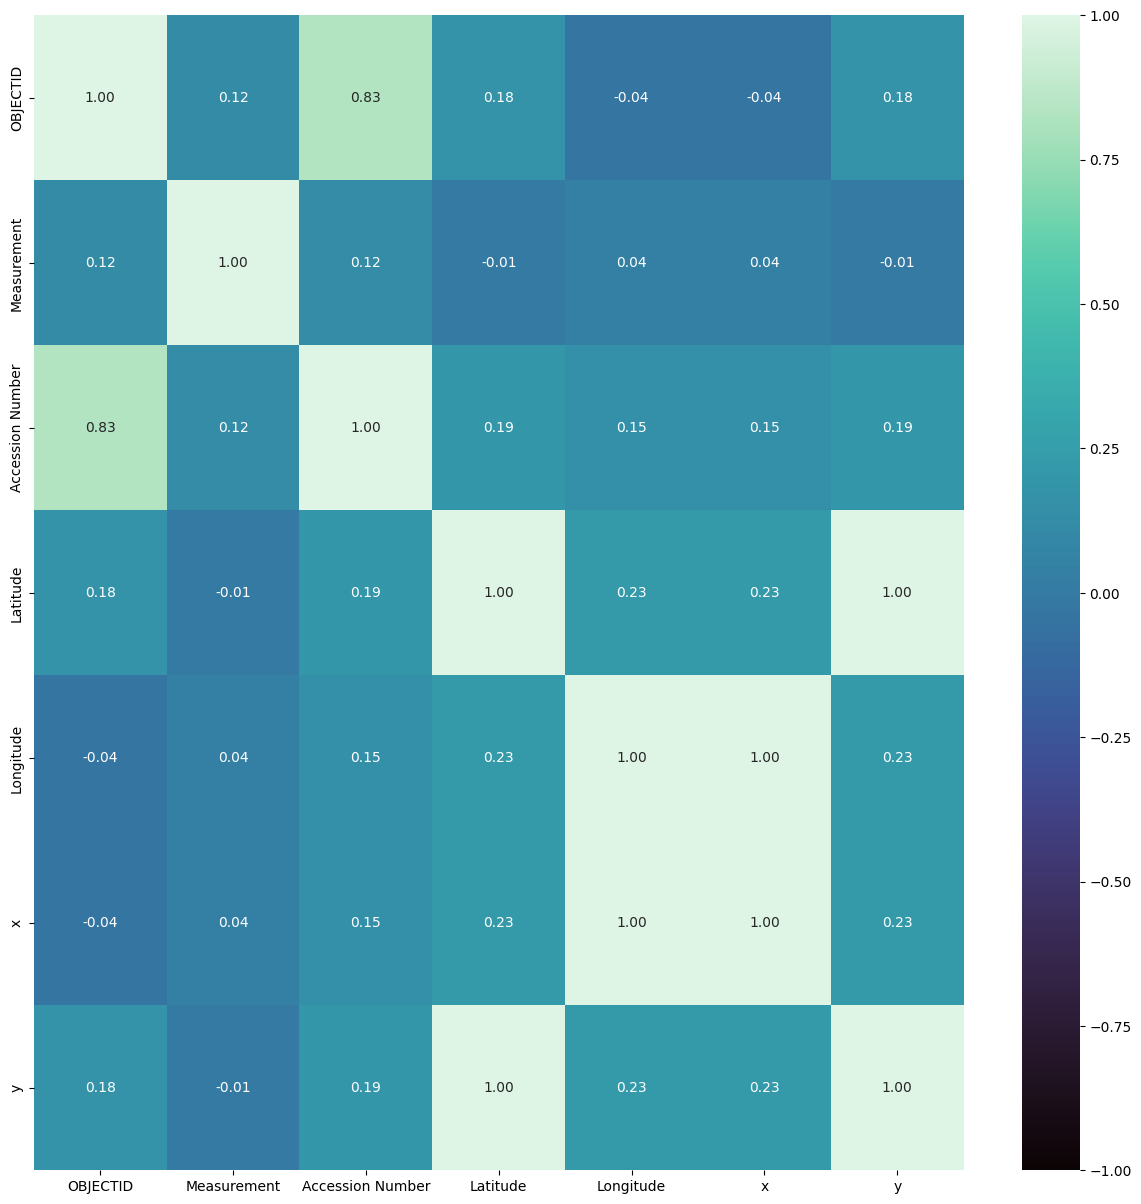

In [32]:
correlacion = df_mp.corr(numeric_only=True)
plt.figure(figsize = (15, 15))

# creamos un heatmap con la máscara correlación
sns.heatmap(correlacion, 
            annot = True, 
            fmt = ".2f", 
            cmap = "mako", 
            vmax = 1, 
            vmin = -1);

In [33]:
cat_cols = df_mp.select_dtypes(include=['object', 'category']).columns

cat_cols = [col for col in df_mp.select_dtypes(include=['object', 'category']).columns if df_mp[col].nunique() <= 10]


In [34]:
cat_cols

['Oceans', 'Unit', 'Density Class']